In [39]:
# import modules
import sys
import os
import numpy as np
import serpentTools
from matplotlib import rc
# add "coremap" directories to path
coremapath = 'C:\\Users\\39346\\Documents\\mycodes\\coreutils\\coremap'
sys.path.append(coremapath)
from CoreMap import CoreMap as cm
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200  # set dpi for increasing plot rendering quality

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('text', usetex=True)

# input file name and location
fname = 'alfred_1_6.txt'

# define geometrical parameters
L = 1.386  # pitch [cm]
rotangle = 60  # rotation angle [degree]

# instance initialisation
core = cm(fname, rotangle, L)

# show attributes of instance "core"
print("CoreMap instance attributes are:")
for k, v in core.__dict__.items():
    print(k)

CoreMap instance attributes are:
rotation_angle
inp
type
assembly
Nx
Ny
fren2serp
serp2fren
serpcentermap


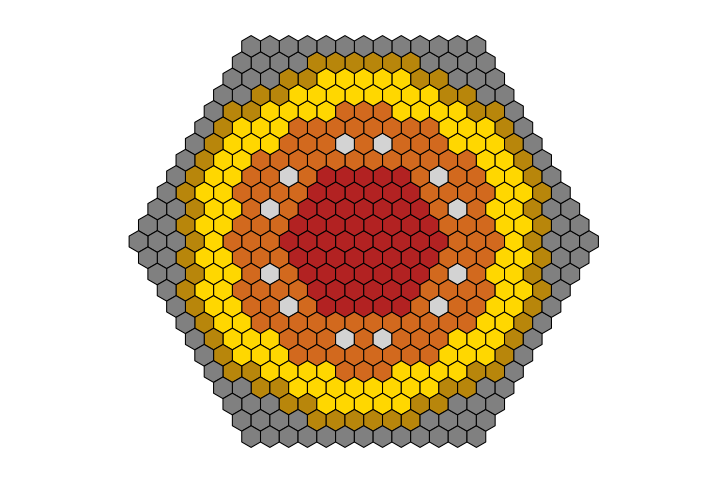

In [23]:
# Do you want to plot the geometry without any label?
core.plot(fill=True)

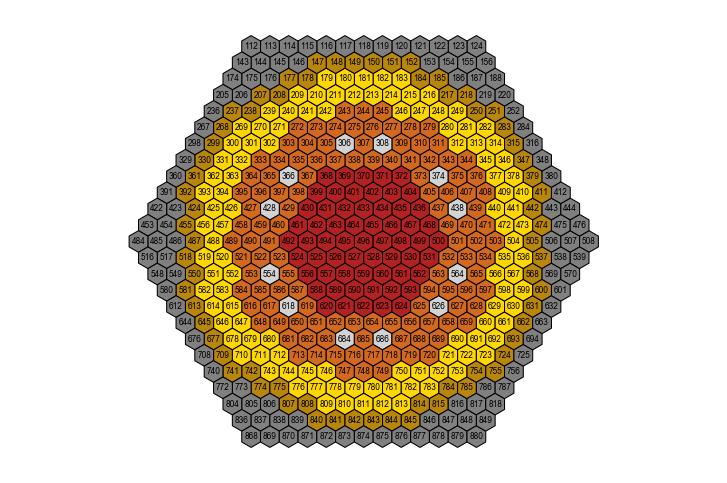

In [24]:
# Do you want to plot the geometry with assembly numbers according to Serpent numeration (default)?
core.plot(label=True)

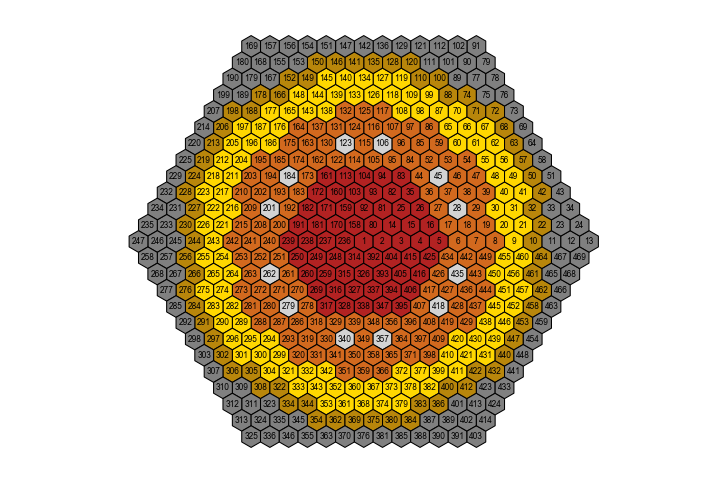

In [25]:
# Do you want to plot the core with FRENETIC assembly numbers?
core.plot(label=True, fren=True)

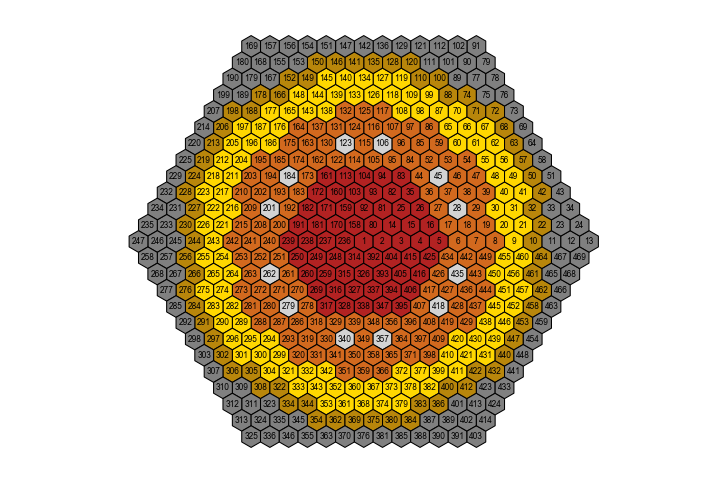

In [26]:
# Do you want to save your nice plot?
core.plot(label=True, fren=True, figname="alfred_fren.png")  # specify figname to save the figure

In [27]:
# print input matrix with assembly types
np.set_printoptions(threshold=sys.maxsize)  # to avoid Jupyter truncation
print(core.inp)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 7 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 6 6 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 6 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 3 3 6 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 3 3 6 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 2 3 3 6 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 3 3 6 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 4 2 3 3 6 7 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 3 3 6 7 7 0 0 

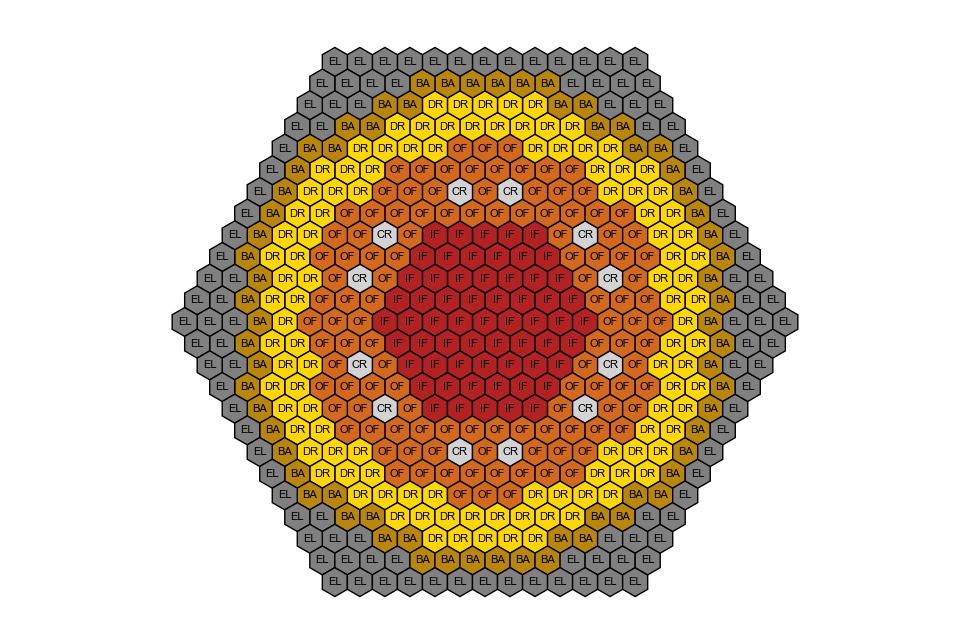

In [30]:
# Do you want custom labels? Just define them using a python dictionary
coretype = [1, 2, 3, 4, 6, 7]  # list with assembly numbers
corelabel = ['IF', 'OF', 'DR', 'CR', 'BA', 'EL']  # list with assembly names (string)
asslabel = dict(zip(coretype, corelabel))  # zip lists and make the zip a dictionary

# plot with customised assembly labels
core.plot(label=True, dictname=asslabel)  # specify figname to save the figure

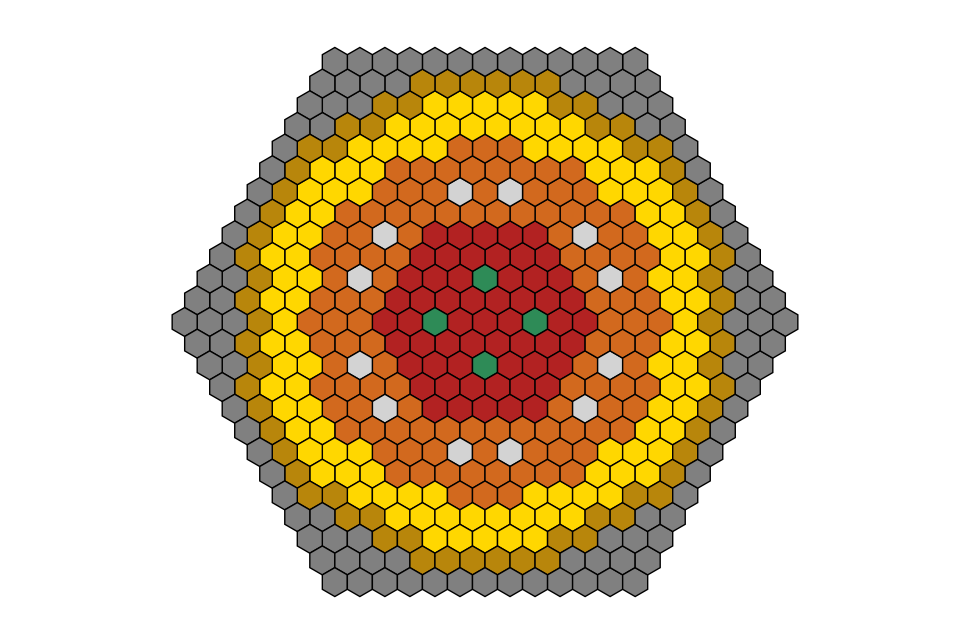

In [31]:
# Do you want to load new assemblies?
# let's load ALFRED's safety rods
SR_fren_position = [92, 326, 237, 3]  # assemblies to be perturbed
SR_type = [5]  # new assembly type
core.loadassembly(SR_type, SR_fren_position, flagfren=1)

# plot new geometry without any label
core.plot()

In [40]:
# Do you want to print it to a file? You can do it
# MODE 1 (Serpent-style)
core.writecoremap(fname="serpent_lattice.txt", serpheader=True)
# print file content
f = open('serpent_lattice.txt', 'r')
file = f.read()
print(file)

# MODE 2 (No Serpent header)
core.writecoremap(fname="lattice.txt")

# MODE 3 (core flattened in a 1D array)
core.writecoremap(flatten=1)  # file saved with default name "coremap.txt"

lat core  3 0.0 0.0 32 32 1.386
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 7 6 6 6 6 6 6 7 7 7 7 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 7 7 7 6 6 3 3 3 3 3 6 6 7 7 7 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 7 7 6 6 3 3 3 3 3 3 3 3 6 6 7 7 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 7 6 6 3 3 3 3 2 2 2 3 3 3 3 6 6 7 0 0 0 0
0 0 0 0 0 0 0 0 0 0 7 6 3 3 3 2 2 2 2 2 2 2 2 3 3 3 6 7 0 0 0 0
0 0 0 0 0 0 0 0 0 7 6 3 3 3 2 2 2 4 2 4 2 2 2 3 3 3 6 7 0 0 0 0
0 0 0 0 0 0 0 0 7 6 3 3 2 2 2 2 2 2 2 2 2 2 2 2 3 3 6 7 0 0 0 0
0 0 0 0 0 0 0 7 6 3 3 2 2 4 2 1 1 1 1 1 2 4 2 2 3 3 6 7 0 0 0 0
0 0 0 0 0 0 7 6 3 3 2 2 2 2 1 1 1 1 1 1 2 2 2 2 3 3 6 7 0 0 0 0
0 0 0 0 0 7 7 6 3 3 2 4 2 1 1 1 1 1 1 1 2 4 2 3 3 6 7 7 0 0 0 0
0 0 0 0 7 7 6 3 3 2 2 2 1 1 1 1 1 1 1 1 2 2 2 3 3 6 7 7 0 0 0 0
0 0 0 7 

In [41]:
# Do you want to print assembly type and center coordinates?
core.writecentermap()  # type, x [cm], y [cm]
# print file content
f = open('centermap.txt', 'r')
file = f.read()
print(file[0:1000])

1 0.0 0.0
1 1.386 0.0
1 2.772 0.0
1 4.1579999999999995 0.0
1 5.544 0.0
2 6.93 0.0
2 8.315999999999999 0.0
2 9.701999999999998 0.0
3 11.088 0.0
6 12.473999999999998 0.0
7 13.859999999999998 0.0
7 15.245999999999999 0.0
7 16.631999999999998 0.0
1 2.0789999999999997 1.200311209645232
1 3.465 1.200311209645232
1 4.850999999999999 1.200311209645232
2 6.236999999999999 1.200311209645232
2 7.622999999999999 1.200311209645232
2 9.008999999999999 1.200311209645232
3 10.394999999999998 1.200311209645232
3 11.780999999999999 1.200311209645232
6 13.166999999999998 1.200311209645232
7 14.552999999999997 1.200311209645232
7 15.938999999999998 1.200311209645232
1 2.772 2.400622419290464
1 4.1579999999999995 2.400622419290464
2 5.544 2.400622419290464
4 6.93 2.400622419290464
2 8.315999999999999 2.400622419290464
3 9.701999999999998 2.400622419290464
3 11.087999999999997 2.400622419290464
6 12.473999999999998 2.400622419290464
7 13.859999999999998 2.400622419290464
7 15.245999999999997 2.4006224192904

In [42]:
# Serpent (v 2.1.31) output path
# read Serpent output file with serpentTools
alfred = serpentTools.read("ALFRED_FC_HFP_det0.m")
# get available tallies
print(alfred.detectors.keys())

POW = alfred.detectors['POW']
tallies = POW.tallies[0, :, :]
errors = POW.errors[0, :, :]

# match 
type(POW.tallies)

dict_keys(['POW', 'FLX'])


numpy.ndarray

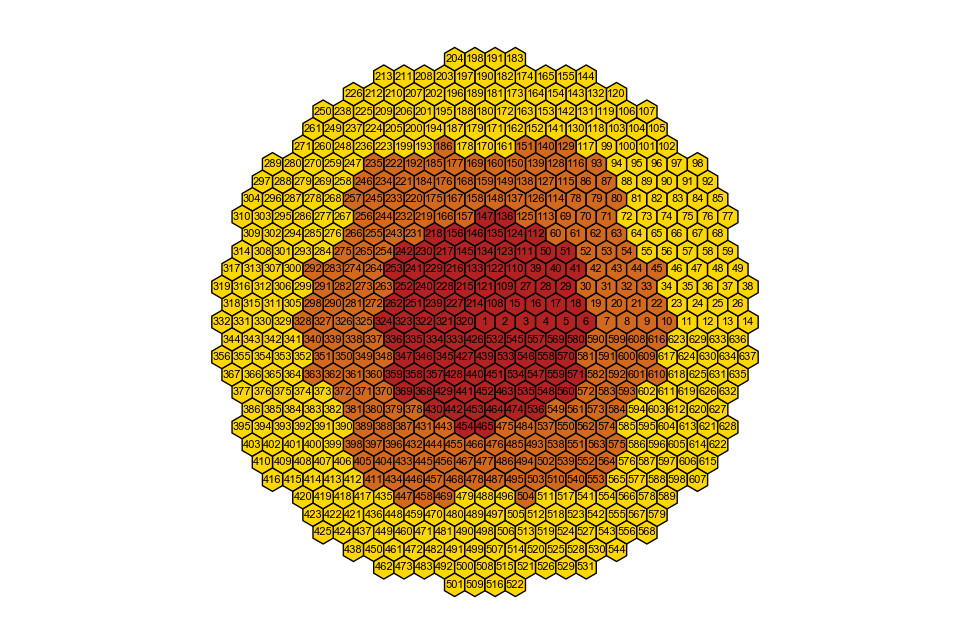

In [44]:
# Now let's see the case of a non-regular core

# input file name and location
fname = 'ebr-II.txt'

# define geometrical parameters
L = 5.8929 # pitch [cm]
rotangle = 60  # rotation angle [degree]

# instance initialisation
core = cm(fname, rotangle, L)

# Do you want to plot the core with FRENETIC assembly numbers?
core.plot(label=True, fren=True)

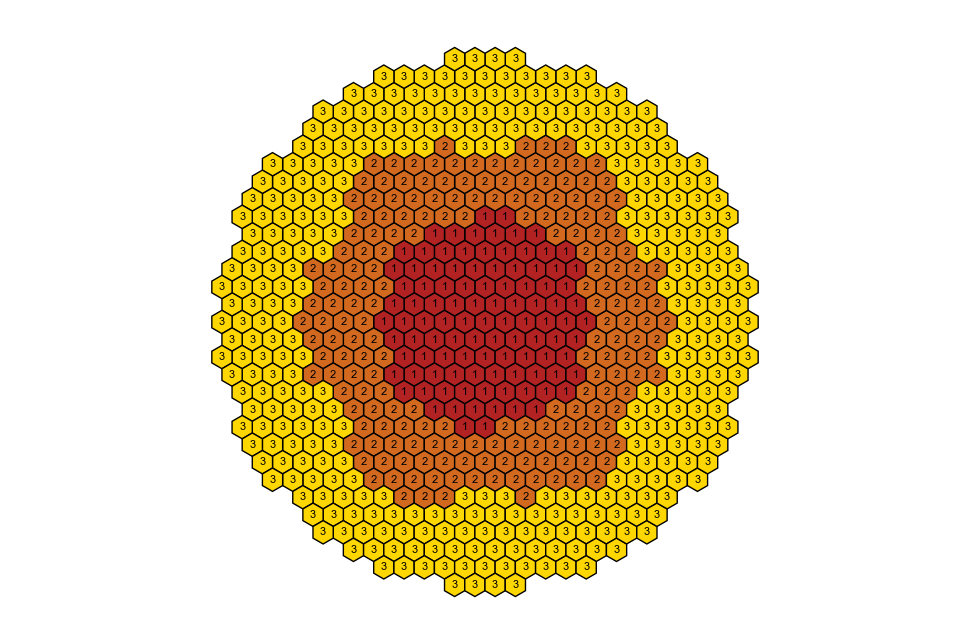

In [45]:
# let's load the different assemblies. To do so, let's look at the current types
coretype = [1, 2, 3]  # list with assembly numbers
corelabel = ['1', '2', '3']  # list with assembly names (string)
asslabel = dict(zip(coretype, corelabel))  # zip lists and make the zip a dictionary

# plot with customised assembly labels
core.plot(label=True, dictname=asslabel)  # specify figname to save the figure

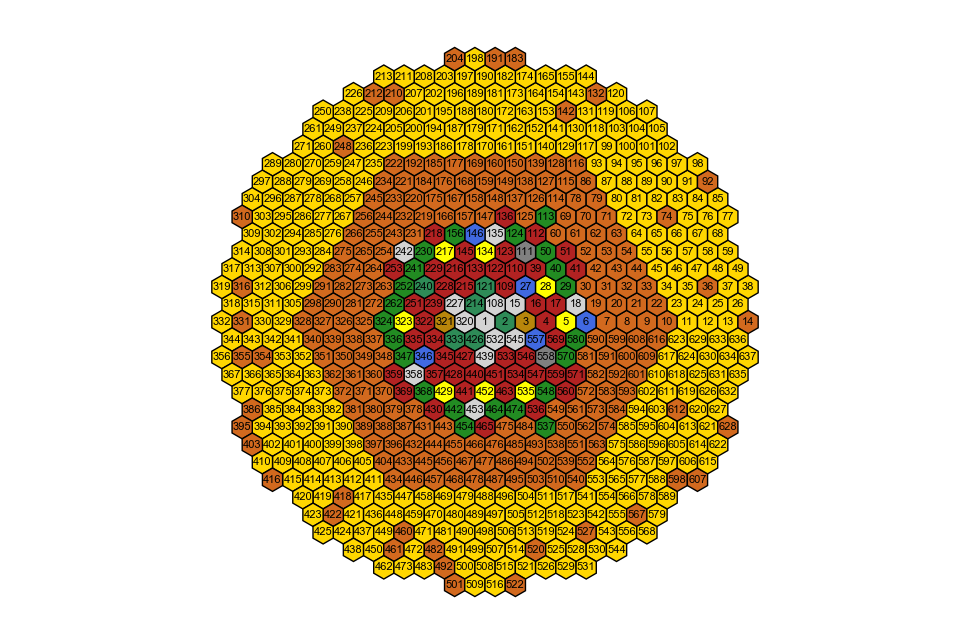

In [46]:
# define new assembly types
newtype = [4, 5, 6, 7, 8, 9, 10]  # core
fren_pos = [[135, 242, 227, 108, 15, 18, 320, 1, 532, 545, 439, 358, 453],
            [240, 121, 214, 2, 333, 426],
            [321, 3],
            [111, 558],
            [146, 27, 6, 557, 346],
            [217, 134, 28, 323, 5, 429, 452, 535],
            [113, 156, 124, 230, 50, 241, 40, 252, 29, 262, 324, 
             336, 580, 347, 570, 368, 548, 442, 464, 474, 454, 537]]  # core
refl_newtype = 2  # reflector
refl_fren_pos = [204, 191, 183, 212, 210, 132, 142, 248, 92, 310, 74, 316,
                 36, 331, 14, 355, 354, 386, 612, 395, 628, 403, 416, 598,
                 607, 418, 422, 567, 460, 527, 461, 482, 520, 492, 501, 522,
                 147]  # reflector
blank_newtype = 3  # blanket
blank_fren_pos = [186, 151, 140, 129, 235, 246, 257, 292, 363, 398, 405, 411,
                  447, 458, 469, 504, 553, 564, 575, 610, 45, 80, 87, 93]  # blanket
# append lists to newtype
newtype.append(refl_newtype)
newtype.append(blank_newtype)
# append lists to fren_pos
fren_pos.append(refl_fren_pos)
fren_pos.append(blank_fren_pos)

core.loadassembly(newtype, fren_pos, flagfren=1)

# plot new geometry with FRENETIC numeration
core.plot(label=True, fren=True)